# Random Forest for Regression

In this notebook we study the Random Forest model (Breiman, 2001) for regression problems. As in the other notebook, we will introduce the model from a theoretical point of view and then we apply it to a concrete example in a mini-challenge. The notebook is structured as followed:

## Table of Contents

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
    - [Hyperparamters](#s1.2)
    - [Advantages and Limitations](#s1.3)
    
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

<hr style="border: dashed rgb(0,0,0) 1px"/>

##  <a class="anchor" id='s1'>Theoretical Analysis</a> 

__Random forests__ or random decision forests are an __Ensemble learning__ methods for classification, regression and other tasks that operate by constructing a multitude of decision trees.

The idea of ensemble learning is to build a prediction model by combining the strengths of a collection of simpler base models sometimes called __weak learners__. A model comprised of many models is called an __Ensemble model__.

We refer in general to two class of ensemble methods:

1. __Boosting__ : Boosting refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Each model that runs, dictates what features the next model will focus on. In boosting as the name suggests, one is learning from other which in turn boosts the learning.


2. __Bootstrap Aggregation (Bagging)__: Bootstrap refers to random sampling with replacement. Bootstrap allows us to better understand the bias and the variance with the dataset. Bootstrap involves random sampling of small subset of data from the dataset. It is a general procedure that can be used to reduce the variance for those algorithm that have high variance, typically decision trees. Bagging makes each model run independently and then aggregates the outputs at the end without preference to any model.



Random forest is a particular method of bagging and it corrects for decision trees habit of overfitting to their training set. Decision trees are sensitive to the specific data on which they are trained. If the training data is changed the resulting decision tree can be quite different and in turn the predictions can be quite different.
Also Decision trees are computationally expensive to train, carry a big risk of overfitting, and tend to find local optima because they can’t go back after they have made a split.
To address these weaknesses, we use to Random Forest which illustrates the power of combining many decision trees into one model.


###  <a class="anchor" id='s1.1'>Algorithm</a> 

As we said in the introduction to this notebook Random Forest is an Ensemble Method based on Boostrapping. Generally, bootstrapping falls in the broader class of [__resampling methods__ ](https://en.wikipedia.org/wiki/Resampling_(statistics)) in statistics and it's the practice of estimating properties of an estimator by measuring those properties when sampling from an approximating distribution. It can be used as a tool for assessing statistical accuracy of an estimator or can be used directly to get the best estimation. In this sense, in the context of Random Forest can be seen as a way to estimate, while in the case of validation methods it turns out to be a way to measure the accuracy and properties of a given estimator. We are going to introduce the idea of bootstrap in a general background in order to specifiy it to our purpose. 

Suppose we have a model fit to a set of training data. We denote the training set by $Z=(z_1,\cdots, z_N)$ where $z_i=(x_i,y_i)$. The basic idea is to draw datasets [__randomly sampling with replacement__](https://en.wikipedia.org/wiki/Sampling_(statistics)) from training data, each sample the same size as the original training set. This is done $B$ times, producing $B$ bootstrap datasets. In summary from a sample coming from a given population of a given distribution we generate other same size samples to use to compute quantities or estimates. The powerness of this method has reminds to the [__Central Limit Theorem__](https://en.wikipedia.org/wiki/Central_limit_theorem) that states that the estimator of the mean of samples of size $N$ from a whatever distribution with expected values $(\mu,\sigma)$,  converge, the limit of large $N$, to a Normal distribution laws with the same expected values $(\mu,\sigma)$ of the original distribution. Therefore generating $B$ samples of size $N$ we could compute the estimators $\hat{u}=\bar{Z}$ for each sample and then finding the mean approaching the real one. 

Let's be more concrete and let's define $S(Z)$ any quantity computed from the sample $Z$, that can be the mean or some prediction at the input points. From the bootstrap sampling we can estimate any aspect of the distribution of $S(Z)$, for example, its variance,

\begin{align*}
\hat{\sigma}[S(Z)]=\frac{1}{B-1}\sum_{b=1}^B\left(S(Z^{*b})-\bar{S}^*\right)
\end{align*}

where $\bar{S}^*=\sum_bS(Z^{*b})/B$. 


<div>
<img width=500 src='images/boot.png' /> 
</div>


In order to approaching Random Forest let's take a further step in this direction and let's see how bootstrapping is implemented in the general problem of learining algorithms. To be specific, let's consider a regression problem. In the framework we just explained, roughly speaking, our estimated quantity $S(Z)$ will be what we always called $\hat{f}$, i.e. the fit from some training set. Here we don't want to just estimate properties of the estimator $\hat{f}$ but we want to use the bootstrapt to directly obtain a new performant estimator. Let's see how it works.

Suppose we fit a model to our training data $Z=\{(x_1,y_1),\cdots, (x_N,y_N)\}$, obtaining the prediction $\hat{f}(x)$ at input $x$. Bagging averages this prediction over a collection of bootstrap sample, thereby reducing the variance.  Given the training set bagging repeatadly $B$ times selects a __random sample with replacement__ $Z^{*}_b\subset Z$ from  training set $Z$ and fits trees to these samples:

For $b=1,\cdots, B$:

1. Sample, with replacement, $B$ training examples of size $N$ from $Z$; call these $Z^{*}_b$

2. Train a regression tree $f_b^*$ on $Z^{*}_b$

The bagging estimates is defined by 

\begin{align*}
\hat{f}_{\text{bag}}(x)=\frac{1}{B}\sum_{b=1}^Bf^*_b(x)
\end{align*}

This bagged estimates will differ from the original estimate $\hat{f}(x)$ only when the latter is a non linear function of the data. For example an interesting case is when the _weak learner_ $\hat{f}$ denotes a tree's prediction. Each bootstrap tree will typically involve different features that the original, and might have a different number of terminal nodes. The bagged estimates is the average over the $B$ trees. 



__Random forests__ is a substantial modification of bagging that builds a large collection of de-correlated trees, and then averages them. The algorithm follows the bagging algorthm we described above:

1. Draw a bootstrap sample $Z^*$ of size $N$ from the training data


2. Grow a random forest tree $T_b$ to the bootstrapped data, by recursively repeating the following step for each terminal node of the tree, until the minimum node size is reached:

    - Select $m$ variables at random from the $p$ features
    - Pick the best variable/split-point among the $m$
    - Split the node into two daughter nodes


3. Display and output the ensemble of trees: $\{T_b\}_1^B$


4. Aggregating and averaging: 

\begin{align*}
\hat{f}_{\text{rf}}^B(x)=\frac{1}{B}\sum_{b=1}^BT_b(x)
\end{align*}

<div>
<img width=600 src='images/rf.png' /> 
</div>

###  <a class="anchor" id='s1.2'>Hyperparamters</a> 

Trees are ideal candidates for bagging, since they can capture complex interaction structures in the data, and if grown sufficiently deep, have relatively low bias. Since trees are notoriously noisy, they benefit greatly from the averaging. Moreover, since each tree generated in bagging is identically distributed (i.d.), the expectation of an average of $B$ such trees is the same as the expectation of any one of them. This means the bias of bagged trees is the same as that of the individual trees, and the only hope of improvement is through variance reduction. This is in contrast to boosting, where the trees are grown in an adaptive way to remove bias, and hence are not i.d.

In bagging methods, an average of $B$ i.i.d. random variables, each with variance $\sigma^2$, has variance $\frac{1}{B}\sigma^2$. Adapting this to bagging, if we have that each weak learner has variance $\sigma^2$, we have

\begin{align*}
\text{Var}\left(\hat{f}_{\text{bag}}^B(x)\right)=\frac{1}{B^2}\sum_{b=1}^B\text{Var}\left(f_b(x)\right)=\frac{1}{B}\sigma^2
\end{align*}

If the variables are simply i.d. (identically distributed, but not necessarily independent) with positive pairwise correlation $\rho$, that takes into account the correlation between two learners, the variance of the average is

\begin{align*}
\text{Var}\left(\hat{f}_{\text{bag}}^B(x)\right)=\rho\sigma^2+\frac{1-\rho}{B}\sigma^2
\end{align*}

As $B$ increases, the second term disappears, but the first remains, and hence the size of the correlation of pairs of bagged learners limits the benefits of averaging.

The idea in random forests algorithm is to improve the variance reduction of bagging by reducing the correlation between the trees, without increasing the variance too much. This is achieved in the tree-growing process through random selection of the input variables.

Specifically, when growing a tree on a bootstrapped dataset:

Before each split, select $m\le p$ of the input variables at random as candidates for splitting. Typically values for $m$ are $\sqrt{p}$ or evenas low as 1. After $B$ such trees $\{T(x;\theta_b)\}_1^B$ are grown, the random forest regression predictor is

\begin{align*}
\hat{f}_{\text{rf}}^B(x)=\frac{1}{B}\sum_{b=1}^BT_b(x; \theta_b)
\end{align*}

where $\theta_b$ characterizes the $b$-th random forest tree in terms of split variables, cutpoints at each node, and terminal-node values. Intuitively, reducing $m$ will reduce the correlation between any pair of trees in the ensemble, and hence reduce the variance of the average.
Not all estimators can be improved by shaking up the data like this. It seems that highly nonlinear estimators, such as trees, benefit the most. For bootstrapped trees, $\rho$ is typically small, while $\sigma^2$ is not much larger than the variance for the original tree. On the other hand, bagging does not change linear estimates.


The analysis of __bias-variance tradeoff__ of the random forest follows from the previous analysis. In particular for the __variance__ the limiting form $B\to\infty$ of the random forest regressor estimator is

\begin{align*}
\hat{f}_{\text{rf}}(x)=E_{\theta |Z}T(x, \theta(Z)))
\end{align*}

where we have made explicit the dependence on the training data $Z$. Here we consider estimation at a single point $x$. From the variance analysis of bagging method we did above we have

\begin{align*}
\text{Var}\left(\hat{f}_{\text{rf}}(x)\right)=\rho(x)\sigma^2(x)
\end{align*}

where we have $\rho(x)=\text{corr}\left[T(x,\theta_1(Z)), T(x,\theta_2(Z))\right]$ and where $\theta_1(Z)$ and $\theta_2(Z)$ are randomly drawn pair of random forest trees grown to the randomly sampled $Z$. Moreover $\sigma^2(x)=\text{Var}\left[T(x,\theta(Z))\right]$.

As in bagging, the __bias__ of a random forest is the same as the bias of any of the individual sampled trees $T(x,\theta(Z))$

\begin{align*}
\text{Bias}(x)&=\mu(x)-E_Z\hat{f}_{\text{rf}}(x)\\
&=\mu(x)-E_ZE_{\theta|Z}T(x,\theta(Z))
\end{align*}

This is typically greater that the bias of an unpruned tree grown to $Z$, since the randomization and reduced sample space impose restrictions. Hence the improvements in prediction obtained by bagging or random forests are solely a result of variance reduction.

In practise the main parameters to adjust when using this method is $B$ and $m$. The former is the number of trees in the forest. The latter is the size of the random subsets of features to consider when splitting a node. The former helps to kill the second term in the variance and the latter helps to make the trees as uncorrelated as possible toghether with the bootstrapping sampling. This lower the correlation between the trees as well and will perform better results. 

###  <a class="anchor" id='s1.3'>Advantages and Limitations</a> 

Amongst the adavantages we mention:

- It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate - classifier.

- It runs efficiently on large databases.

- It can handle thousands of input variables without variable deletion.

- It gives estimates of what variables that are important in the classification.

- It generates an internal unbiased estimate of the generalization error as the forest building progresses.

- It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.

Amongst the limitations we have:

- Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.

- For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.


<hr style="border: dashed rgb(0,0,0) 1px"/>

##  <a class="anchor" id='s2'>Implementation in Python</a> 

The class `RandomForestRegressor` of the module `sklearn.ensemble` is:

`RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)`

The details of Random Forest package in `sklearn` can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

<hr style="border: dashed rgb(0,0,0) 1px"/>

##  <a class="anchor" id='s3'>Mini-challenge</a> 

We still study in this mini challenge the dasaset of the pricing house of Boston. We will use the Random Forest for regression and we will try to optimize the hyperparameters of the model in order to get a hig accuracy that we will compare with the linear models. As in the previous case we structure the section as follows:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots, get_dataset
from sklearn.utils.random import sample_without_replacement


from itertools import product

import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [2]:
df=pd.read_csv('data/dataset_paris.csv')

In [3]:
df.shape

(18791, 24)

In [4]:
df.head()

,bathrooms,bedrooms,beds,is_fully_refundable,is_host_highly_rated,is_new_listing,latitude,longitude,person_capacity,weekly_factor,...,Kitchen,Breakfast,Essentials,available,local_price,min_nights,week_number,entire_home,private_room,shared_room
0,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,35,0,1,0
1,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,36,0,1,0
2,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.857143,47.000000,1.0,37,0,1,0
3,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.142857,43.571429,1.0,38,0,1,0
4,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.000000,43.571429,1.0,39,0,1,0


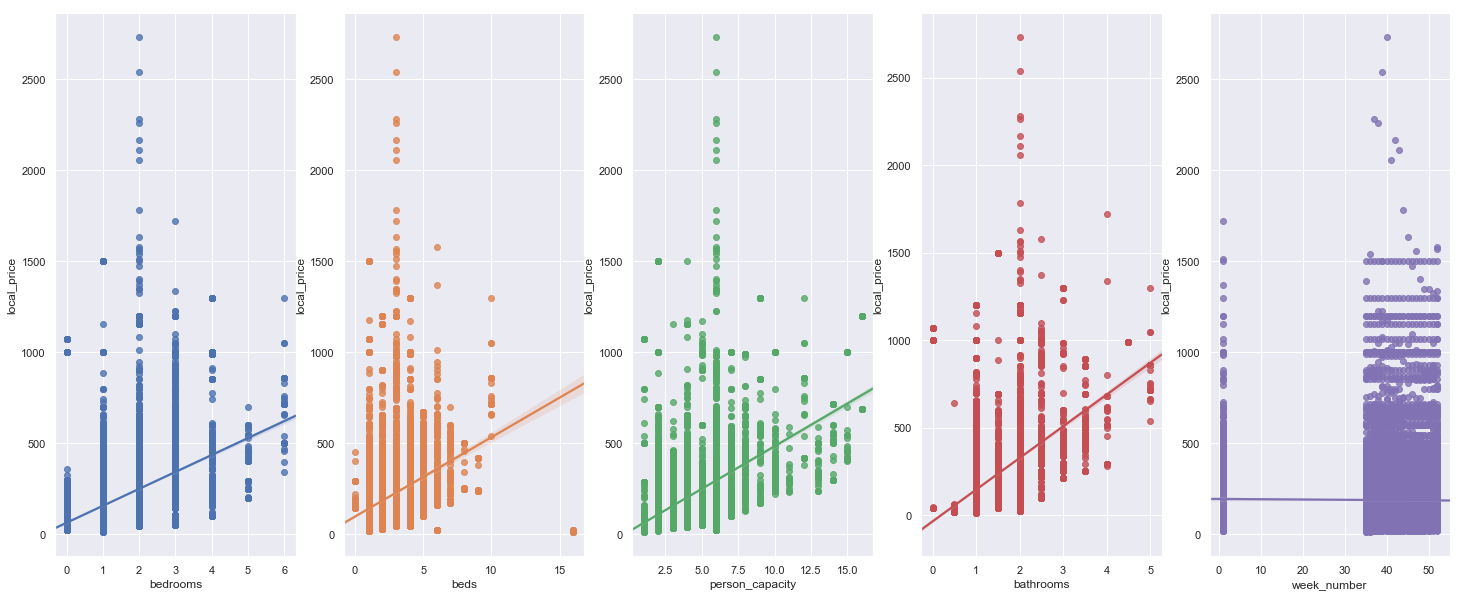

In [5]:
sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=1,ncols=5,figsize=(25,10),squeeze=False)
for i,feat in enumerate(['bedrooms','beds','person_capacity','bathrooms','week_number']):
    sns.regplot(x=feat, y='local_price', data=df, ax=axs[0][i])

### Model Selection

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('local_price',axis=1), df.local_price, test_size=0.2, random_state=10)

In [7]:
model=RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)

r2_score(y_test, model.predict(X_test))

0.9665480997024399

In [9]:
grid_params = {
    'max_features': np.arange(1,10,1),
    'n_estimators': np.arange(2,200,20)
}

cv_result = {
    'test_score': [],
    'parameters': []
}

for params in product(*grid_params.values()):
    
    model = RandomForestRegressor(max_features=params[0], n_estimators=params[1])
    model.fit(X_train, y_train)
    test_score = r2_score(y_test, model.predict(X_test))
    
    cv_result['test_score'].append(test_score)
    cv_result['parameters'].append(params)

In [14]:
def plot_grid_results(cv):
    score_matrix = np.asarray(cv["test_score"]).reshape((len(grid_params['max_features']),len(grid_params['n_estimators'])))

    plt.figure(figsize=(22, 10))
    plt.title("Scores R2")
    sns.set(font_scale=1.5)
    annotations = np.array([[str("{:2.1f}".format(x * 100))
                              for x in row ] for row in score_matrix])
    ax = sns.heatmap(score_matrix, annot=annotations, fmt="",
               yticklabels=grid_params["max_features"],
               xticklabels=grid_params["n_estimators"],annot_kws={"size":2*len(grid_params['n_estimators'])})
    ax.set(ylabel="max_features", xlabel="n_estimators")

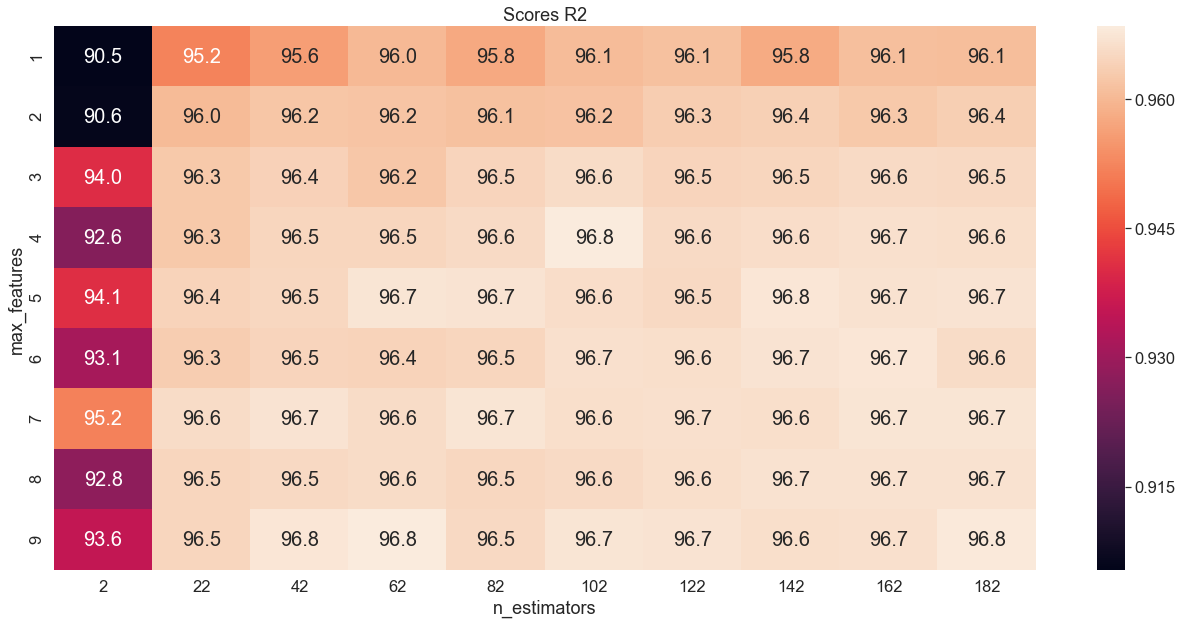

In [15]:
plot_grid_results(cv_result)

In [16]:
kf= KFold(n_splits=3, shuffle=True)
grid_params = {
    'max_features': np.arange(1,10,1),
    'n_estimators': np.arange(50,140,5),
}
model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(model, param_grid=grid_params, n_jobs=-1, cv=kf, refit='MSE')
clf.fit(df.drop('local_price',axis=1), df.local_price)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135])},
       pre_dispatch='2*n_jobs', refit='MSE', return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=85, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [18]:
clf.best_params_

{'max_features': 7, 'n_estimators': 85}

In [19]:
clf.n_splits_

3

In [20]:
clf.best_score_

0.9631077738718229

### Model Assessment

In [21]:
def r2(rep):
    rkf= RepeatedKFold(n_splits=3, n_repeats=rep, random_state=None)
    r2=[]
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('local_price',axis=1)
        y_fold_train = df['local_price'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('local_price',axis=1)
        y_fold_test = df['local_price'].values[test_I]
        reg = clf.best_estimator_
        reg.fit(X_fold_train, y_fold_train)
        r2.append(r2_score(y_fold_test, reg.predict(X_fold_test)))
    
    print('The estimation of the r2 score over the test distributions is:', "{:2.2f}%".format(np.mean(r2)*100),'\u00B1', "{:2.2f}%".format(np.std(r2)*100))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(r2, q=[0.025, 0.975]) * 100))
    
    return r2

The estimation of the r2 score over the test distributions is: 96.45% ± 0.59%
The confidence interval is [94.9%, 97.4%]


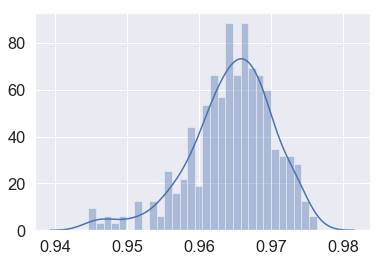

In [22]:
sns.distplot(r2(100),bins=30)

### Intepretability 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('local_price',axis=1), df.local_price, test_size=0.3, random_state=10)

In [24]:
reg = clf.best_estimator_
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=85, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [25]:
features_imp = pd.DataFrame(
    data=np.asarray([df.columns.drop('local_price'), reg.feature_importances_]).transpose(),
    columns=['Variable', 'Importance'])
features_imp

,Variable,Importance
0,bathrooms,0.186493
1,bedrooms,0.118675
2,beds,0.0481237
3,is_fully_refundable,0.00726304
4,is_host_highly_rated,0.0138725
5,is_new_listing,0.0068497
6,latitude,0.0818478
7,longitude,0.132127
8,person_capacity,0.134729
9,weekly_factor,0.0256923


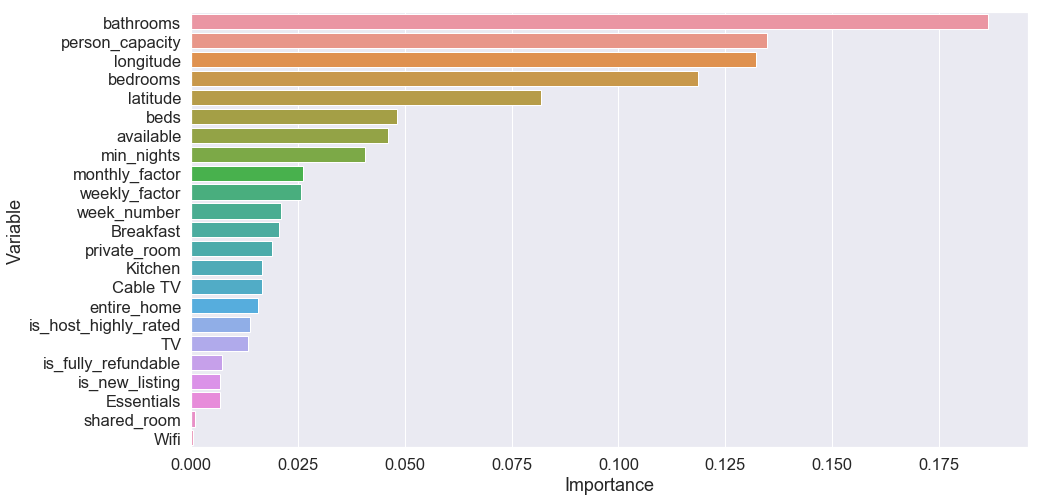

In [29]:
fig=plt.figure(figsize=(15,8))
sns.barplot(y='Variable', x='Importance', data=features_imp.sort_values(by='Importance', ascending=False))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('local_price',axis=1), df.local_price, shuffle=True, train_size=0.8, random_state=42)

model=clf.best_estimator_
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=85, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [31]:
perm = PermutationImportance(model, random_state=1, n_iter=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3472 ± 0.0287,person_capacity
0.3157 ± 0.0172,bathrooms
0.2589 ± 0.0242,bedrooms
0.2511 ± 0.0266,longitude
0.0768 ± 0.0095,latitude
0.0486 ± 0.0126,available
0.0442 ± 0.0076,beds
0.0336 ± 0.0053,TV
0.0306 ± 0.0059,Cable TV
0.0300 ± 0.0069,private_room


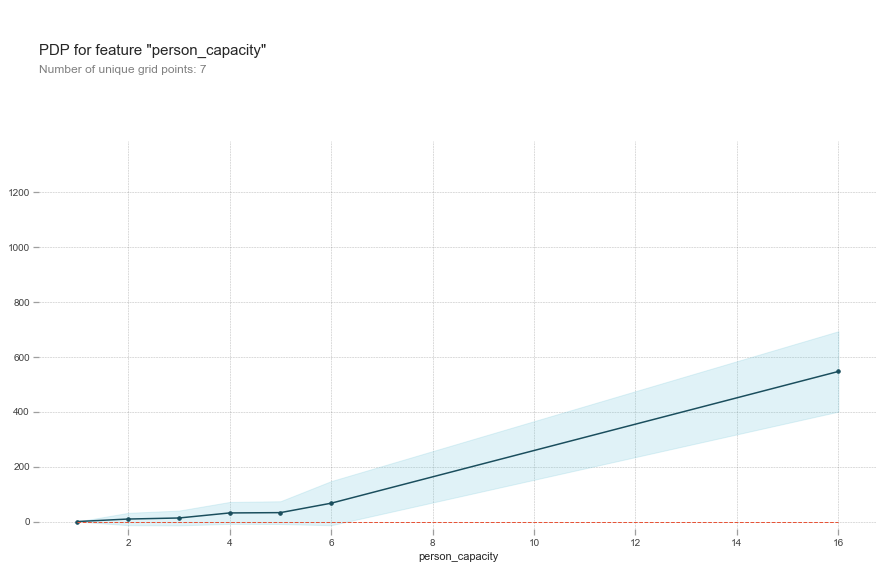

In [32]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature='person_capacity')


pdp.pdp_plot(pdp_goals, 'person_capacity')
plt.show()